In [1]:
!pip install keras==2.10.0
!pip install tensorflow==2.10.0
!pip install h5py==3.7.0

In [2]:
!pip install emoji

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing all libraries
import os
import re
import string
import pickle
import itertools
import math,nltk
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import keras.backend as K
from keras.models import Model
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import load_model
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import SnowballStemmer
from keras.utils import to_categorical
from sklearn import feature_extraction
from keras.layers import Conv1D,GRU
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from keras.layers import Layer
from keras.layers import Conv1D,GRU
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, concatenate, Flatten, LSTM, Bidirectional, Embedding, Input
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
from wordcloud import WordCloud
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
_wnl = nltk.WordNetLemmatizer()

In [6]:
df = pd.read_csv("/content/drive/MyDrive/toxic_comment_classification/Data/train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.shape

(159571, 8)

In [8]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
df.drop(['id', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate'],axis=1,inplace=True)

In [10]:
df.shape

(159571, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  159571 non-null  object
 1   toxic         159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [12]:
df.describe()

,toxic
count,159571.000000
mean,0.095844
std,0.294379
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
df.isna().sum()

comment_text    0
toxic           0
dtype: int64

In [14]:

def normalize_word(w):
  return _wnl.lemmatize(w).lower()

def get_tokenized_lemmas(s):
  return [normalize_word(t) for t in nltk.word_tokenize(s)]

def clean(text):
  # Cleans a string: Lowercasing, trimming, removing non-alphanumeric
  text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation),''))
  return " ".join(re.findall(r'\w+', text, flags=re.UNICODE)).lower()

def remove_stopwords(l):
  # Removes stopwords from a list of tokens
  return [w for w in l if w not in feature_extraction.text.ENGLISH_STOP_WORDS]

def join_tok(text):
  return " ".join(text).lower()

def process(texts):
  lst=[]
  for text in tqdm(texts):
    clean_text= clean(text)
    tok_text= get_tokenized_lemmas(clean_text)
    remov_stp= remove_stopwords(tok_text)
    lst.append(join_tok(remov_stp))
  return lst


In [15]:
comments_text= process(df['comment_text'])

100%|██████████| 159571/159571 [02:07<00:00, 1251.70it/s]


In [16]:
comments_text[:10]

['explanation edits username hardcore metallica fan reverted weren t vandalism just closure gas voted new york doll fac don t remove template talk page m retired 89 205 38 27',
 'd aww match background colour m seemingly stuck thanks talk 21 51 january 11 2016 utc',
 'hey man m really trying edit war s just guy constantly removing relevant information talking edits instead talk page care formatting actual info',
 't make real suggestion improvement wondered section statistic later subsection type accident think reference need tidying exact format date format later doe preference formatting style reference want let know appears backlog article review guess delay reviewer turn s listed relevant form wikipedia good article nomination transport',
 'sir hero chance remember page s',
 'congratulation use tool talk',
 'cocksucker piss work',
 'vandalism matt shirvington article ha reverted don t banned',
 'sorry word nonsense wa offensive m intending write article wow jump vandalism m merely 

In [17]:
def plotwordcloud(classname, label):
  plt.figure(figsize=(8,8))
  text = ' '.join(df.comment_text[df[classname]==label])
  wc = WordCloud(background_color='black',stopwords=stopwords).generate(text)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(classname+ "=" + str(label),fontsize=25)

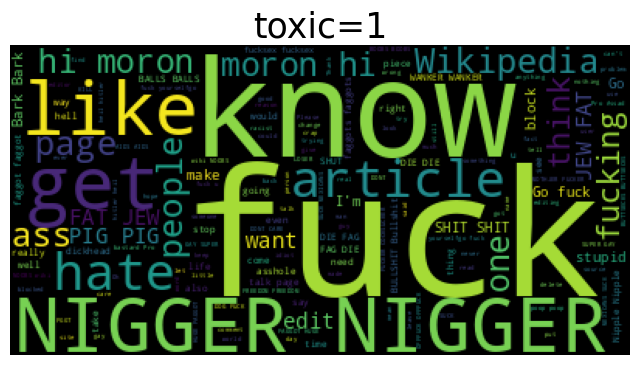

In [18]:
plotwordcloud(classname='toxic', label=1)

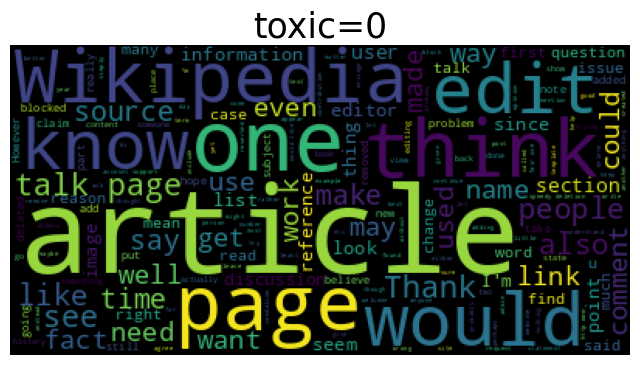

In [19]:
plotwordcloud(classname='toxic', label=0)

In [32]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

<Axes: xlabel='toxic', ylabel='count'>

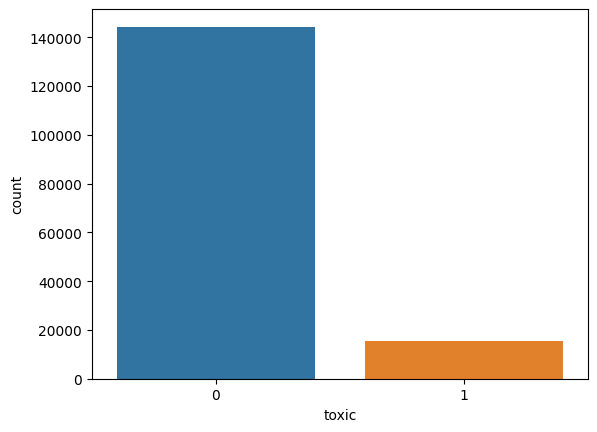

In [20]:
sns.countplot(x=df['toxic'])

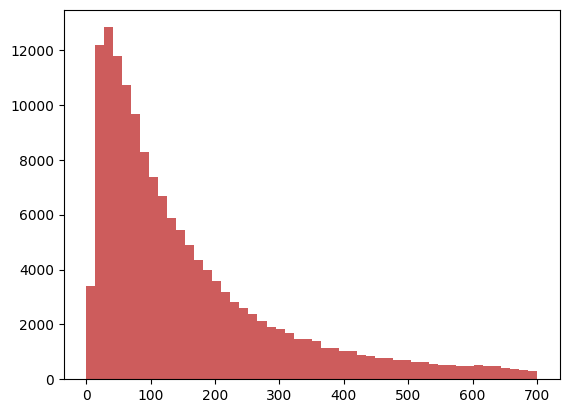

In [21]:
text_lengths = []
for cmt_text in comments_text:
  text_lengths.append(len(cmt_text))
plt.hist(text_lengths, bins=50, color='indianred', range=(0,700))
plt.show()

In [22]:
y = to_categorical(df['toxic'])

# GRU with GLOVE EMBEDDING

In [23]:
embedding_dict={}
with open('/content/drive/My Drive/toxic_comment_classification/glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

tok= Tokenizer()
tok.fit_on_texts(comments_text)
titles=tok.texts_to_sequences(comments_text)
titles = pad_sequences(titles,maxlen=500,padding='post')

global vocab_size
vocab_size= len(tok.word_index)+1

word_index=tok.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

labels= y
max_len=500

X_train, X_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=42, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle= True)

print("Training data size: ", X_train.shape[0])
print("Validation data size: ", X_val.shape[0])
print("Testing data size: ", X_test.shape[0])

Number of unique words: 176203


100%|██████████| 176203/176203 [00:00<00:00, 266575.34it/s]


Training data size:  102124
Validation data size:  25532
Testing data size:  31915


In [24]:
embed_len = 300
model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=tf.keras.initializers\
                    .Constant(embedding_matrix),input_length=titles.shape[1],trainable=False))
model.add(GRU(16, return_sequences=True))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= SGD(lr=0.001, momentum=0.777) , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          52861200  
                                                                 
 gru (GRU)                   (None, 500, 16)           15264     
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                                 
 dense (Dense)               (None, 8)                 64008     
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 52,940,490
Trainable params: 79,290
Non-tr

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/5
1596/1596 [==============================] - 39s 20ms/step - loss: 0.3459 - accuracy: 0.9024 - val_loss: 0.2812 - val_accuracy: 0.9019
Epoch 2/5
1596/1596 [==============================] - 28s 18ms/step - loss: 0.2786 - accuracy: 0.9052 - val_loss: 0.2460 - val_accuracy: 0.9027
Epoch 3/5
1596/1596 [==============================] - 26s 16ms/step - loss: 0.2489 - accuracy: 0.9101 - val_loss: 0.2249 - val_accuracy: 0.9047
Epoch 4/5
1596/1596 [==============================] - 28s 18ms/step - loss: 0.2338 - accuracy: 0.9152 - val_loss: 0.2110 - val_accuracy: 0.9105
Epoch 5/5
1596/1596 [==============================] - 30s 19ms/step - loss: 0.2212 - accuracy: 0.9181 - val_loss: 0.1980 - val_accuracy: 0.9188


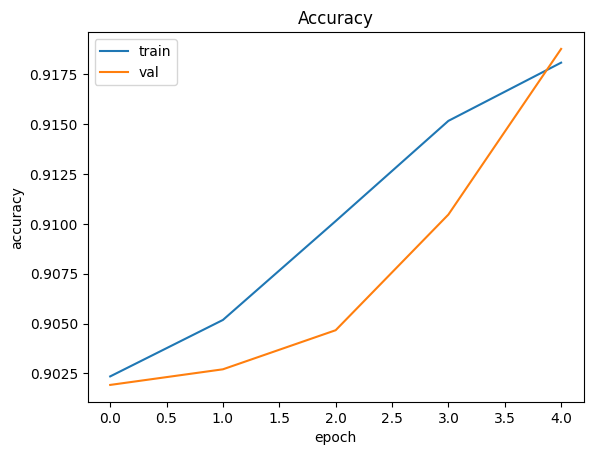

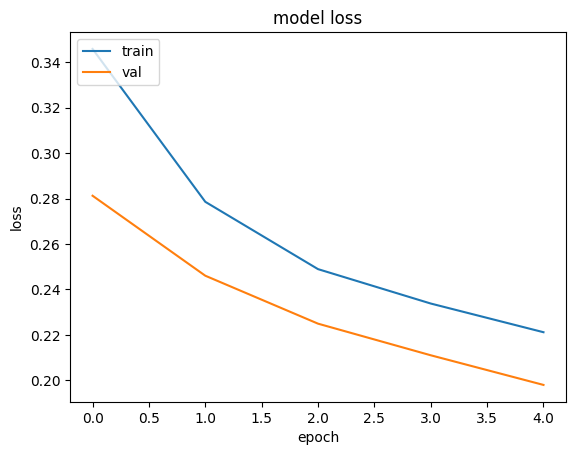

In [26]:
#accuracy and loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [27]:
#Prediction
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

998/998 [==============================] - 8s 8ms/step


Text(0.5, 427.9555555555555, 'Predicted label')

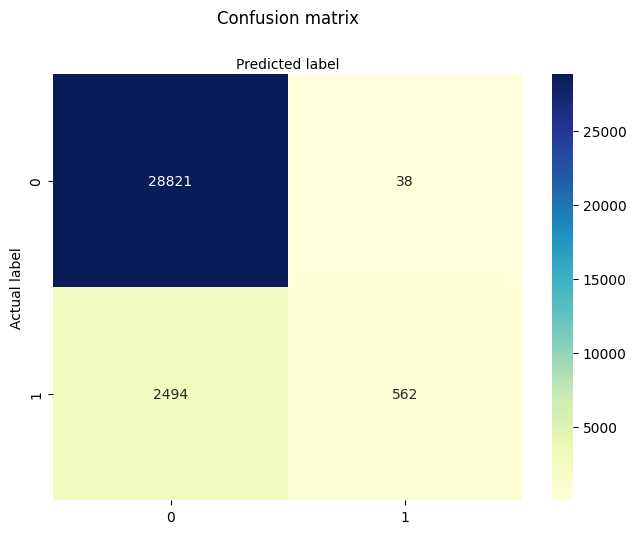

In [28]:
#confusion Matrix
matrix =confusion_matrix(y_test_new, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [29]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28859
           1       0.94      0.18      0.31      3056

    accuracy                           0.92     31915
   macro avg       0.93      0.59      0.63     31915
weighted avg       0.92      0.92      0.90     31915



In [30]:
pre = []
for l in range(2):
  prec,recall,_,_ = precision_recall_fscore_support(y_test_new==l,y_pred==l,pos_label=True,average=None)
  pre.append([l,recall[1],recall[0]])
pd.DataFrame(pre,columns = ['class','specificity', 'sensitivity'])

,class,specificity,sensitivity
0,0,0.998683,0.183901
1,1,0.183901,0.998683


#GRU with FASTTEXT EMBEDDING

In [31]:
embedding_dict={}
with open('/content/drive/MyDrive/toxic_comment_classification/crawl-300d-2M.vec','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

tok= Tokenizer()
tok.fit_on_texts(comments_text)
titles=tok.texts_to_sequences(comments_text)
titles = pad_sequences(titles,maxlen=500,padding='post')

global vocab_size
vocab_size= len(tok.word_index)+1

word_index=tok.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

labels= y
max_len=500

X_train, X_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=42, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle= True)

print("Training data size: ", X_train.shape[0])
print("Validation data size: ", X_val.shape[0])
print("Testing data size: ", X_test.shape[0])

Number of unique words: 176203


100%|██████████| 176203/176203 [00:00<00:00, 197690.19it/s]


Training data size:  102124
Validation data size:  25532
Testing data size:  31915


In [32]:
embed_len = 300
model= Sequential()
model.add(Embedding(vocab_size,embed_len,embeddings_initializer=tf.keras.initializers\
                    .Constant(embedding_matrix),input_length=titles.shape[1],trainable=False))
model.add(GRU(6, return_sequences=True))
model.add(Flatten())
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.1), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 300)          52861200  
                                                                 
 gru_1 (GRU)                 (None, 500, 6)            5544      
                                                                 
 flatten_1 (Flatten)         (None, 3000)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 12004     
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 52,878,758
Trainable params: 17,558
Non-

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/5
1596/1596 [==============================] - 34s 20ms/step - loss: 0.3502 - accuracy: 0.9045 - val_loss: 0.3251 - val_accuracy: 0.9020
Epoch 2/5
1596/1596 [==============================] - 29s 18ms/step - loss: 0.3168 - accuracy: 0.9047 - val_loss: 0.3252 - val_accuracy: 0.9020
Epoch 3/5
1596/1596 [==============================] - 28s 18ms/step - loss: 0.3167 - accuracy: 0.9047 - val_loss: 0.3265 - val_accuracy: 0.9020
Epoch 4/5
1596/1596 [==============================] - 29s 18ms/step - loss: 0.3168 - accuracy: 0.9047 - val_loss: 0.3210 - val_accuracy: 0.9020
Epoch 5/5
1596/1596 [==============================] - 30s 19ms/step - loss: 0.3167 - accuracy: 0.9047 - val_loss: 0.3222 - val_accuracy: 0.9020


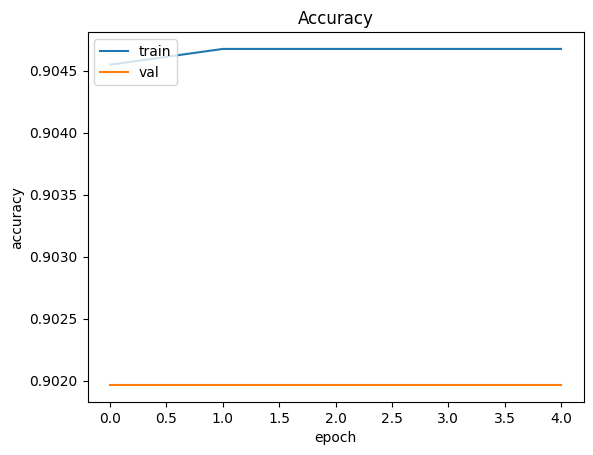

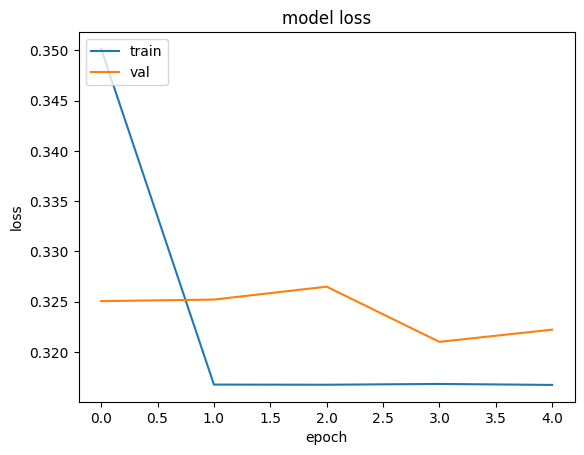

In [34]:
#accuracy and loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [35]:
#Prediction
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

998/998 [==============================] - 7s 7ms/step


Text(0.5, 427.9555555555555, 'Predicted label')

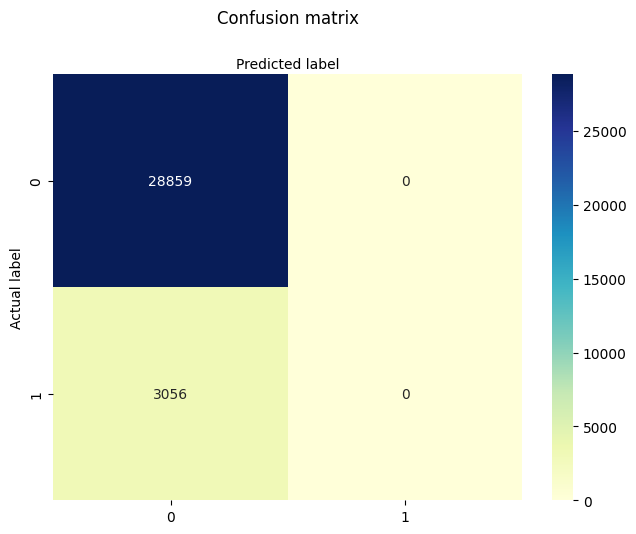

In [36]:
#confusion Matrix
matrix =confusion_matrix(y_test_new, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [37]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28859
           1       0.00      0.00      0.00      3056

    accuracy                           0.90     31915
   macro avg       0.45      0.50      0.47     31915
weighted avg       0.82      0.90      0.86     31915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
pre = []
for l in range(2):
  prec,recall,_,_ = precision_recall_fscore_support(y_test_new==l,y_pred==l,pos_label=True,average=None)
  pre.append([l,recall[1],recall[0]])
pd.DataFrame(pre,columns = ['class','specificity', 'sensitivity'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,class,specificity,sensitivity
0,0,1.0,0.0
1,1,0.0,1.0


# GRU with HYBRID EMBEDDING

In [23]:
embedding_matrix = np.load('/content/drive/MyDrive/toxic_comment_classification/embedding_matrix_big.npy') #hybrid embedding(glove+fastext)

tok= Tokenizer()
tok.fit_on_texts(comments_text)
titles=tok.texts_to_sequences(comments_text)
titles = pad_sequences(titles,maxlen=500,padding='post')

global vocab_size
vocab_size= len(tok.word_index)+1

word_index=tok.word_index
print('Number of unique words:',len(word_index))

labels= y
max_len=500

X_train, X_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=42, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle= True)

print("Training data size: ", X_train.shape[0])
print("Validation data size: ", X_val.shape[0])
print("Testing data size: ", X_test.shape[0])

Number of unique words: 176203
Training data size:  102124
Validation data size:  25532
Testing data size:  31915


In [24]:
model= Sequential()
model.add(Embedding(*embedding_matrix.shape, weights=[embedding_matrix],input_length=titles.shape[1],trainable=False))
model.add(GRU(12, return_sequences=True))
model.add(Flatten())
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 600)          248515200 
                                                                 
 gru (GRU)                   (None, 500, 12)           22104     
                                                                 
 flatten (Flatten)           (None, 6000)              0         
                                                                 
 dense (Dense)               (None, 6)                 36006     
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
Total params: 248,573,324
Trainable params: 58,124
Non-t

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/5
1596/1596 [==============================] - 38s 20ms/step - loss: 0.3350 - accuracy: 0.9043 - val_loss: 0.3209 - val_accuracy: 0.9020
Epoch 2/5
1596/1596 [==============================] - 31s 19ms/step - loss: 0.3165 - accuracy: 0.9047 - val_loss: 0.3220 - val_accuracy: 0.9020
Epoch 3/5
1596/1596 [==============================] - 29s 18ms/step - loss: 0.3162 - accuracy: 0.9047 - val_loss: 0.3215 - val_accuracy: 0.9020
Epoch 4/5
1596/1596 [==============================] - 31s 19ms/step - loss: 0.3163 - accuracy: 0.9047 - val_loss: 0.3245 - val_accuracy: 0.9020
Epoch 5/5
1596/1596 [==============================] - 30s 19ms/step - loss: 0.3168 - accuracy: 0.9047 - val_loss: 0.3239 - val_accuracy: 0.9020


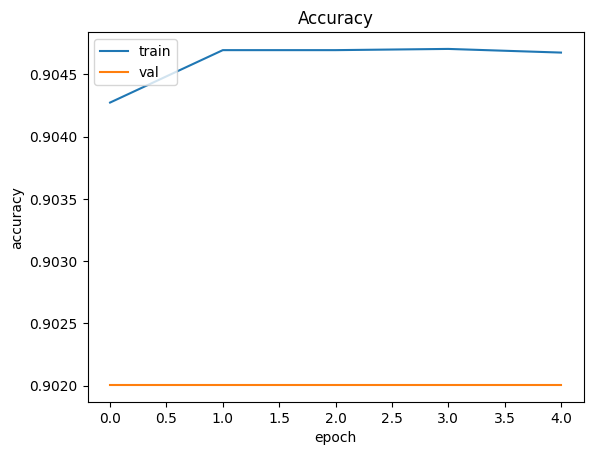

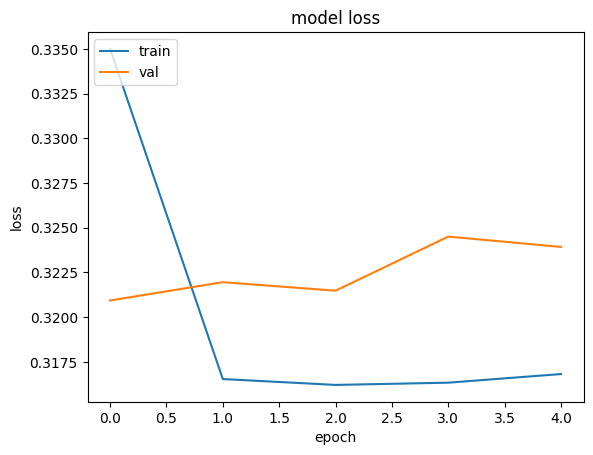

In [26]:
#accuracy and loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [27]:
#Prediction
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

998/998 [==============================] - 9s 8ms/step


Text(0.5, 427.9555555555555, 'Predicted label')

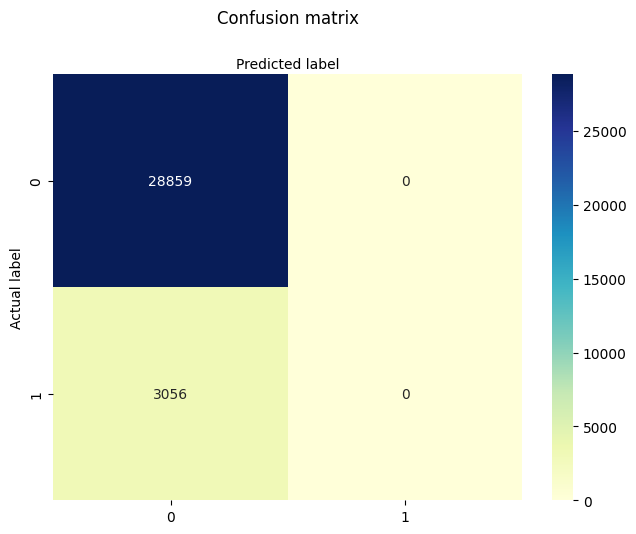

In [28]:
#confusion Matrix
matrix =confusion_matrix(y_test_new, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [29]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28859
           1       0.00      0.00      0.00      3056

    accuracy                           0.90     31915
   macro avg       0.45      0.50      0.47     31915
weighted avg       0.82      0.90      0.86     31915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
pre = []
for l in range(2):
  prec,recall,_,_ = precision_recall_fscore_support(y_test_new==l,y_pred==l,pos_label=True,average=None)
  pre.append([l,recall[1],recall[0]])
pd.DataFrame(pre,columns = ['class','specificity', 'sensitivity'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,class,specificity,sensitivity
0,0,1.0,0.0
1,1,0.0,1.0


# Testing

In [31]:
#testing code
inputtxt = "COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK"
inputtxt = [inputtxt]
cleantxt = process(inputtxt)
toktext=tok.texts_to_sequences(cleantxt)
toktext = pad_sequences(toktext,maxlen=500,padding='post')
output = model.predict(toktext)
output = np.argmax(output,axis=1)
if output == 1:
  print("Toxic Comment")
else:
  print("Non Toxic Comment")

100%|██████████| 1/1 [00:00<00:00, 2150.93it/s]

1/1 [==============================] - 0s 29ms/step
Non Toxic Comment
